In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
dfx = pd.read_csv('../input/stocktrain/x_train.csv')
dfy = pd.read_csv('../input/stocktrain/y_train.csv')

In [3]:
print(dfx.shape)
print(dfy.shape)

(1257, 1)
(1257, 1)


In [4]:
print(dfx.head())

     High
0  332.83
1  333.87
2  330.75
3  328.77
4  322.29


In [5]:
print(dfy.head())

     High
0  333.87
1  330.75
2  328.77
3  322.29
4  315.72


In [6]:
from matplotlib import pyplot as plt

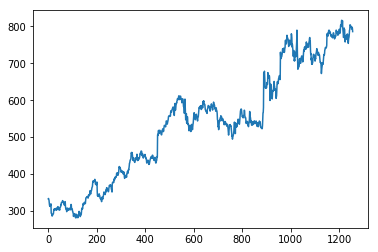

In [7]:

plt.plot(dfx)

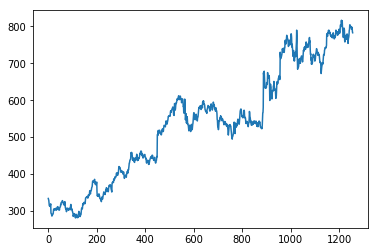

In [8]:
plt.plot(dfy)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
dfx = scaler.fit_transform(dfx)

In [11]:
print(type(dfx))

<class 'numpy.ndarray'>


In [12]:
print(dfx.shape)

(1257, 1)


In [13]:
trainY = dfy.values

In [14]:
print(trainY.shape)
sc = MinMaxScaler(feature_range = (0, 1))
#X_train = sc.fit_transform(X_train)
trainY = sc.fit_transform(trainY)

(1257, 1)


In [15]:
print(trainY)

[[0.09834351]
 [0.09251685]
 [0.08881917]
 ...
 [0.95807422]
 [0.94257381]
 [0.93669113]]


In [16]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from subprocess import check_output
from keras import optimizers
#from sklearn.cross_validation import  train_test_split

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [17]:
trainX = np.reshape(dfx, (dfx.shape[0], 1, dfx.shape[1]))
#testX = np.reshape(f, (f.shape[0], 1, f.shape[1]))

In [18]:
print(trainX.shape)
print(trainY.shape)
#print(testX.shape)

(1257, 1, 1)
(1257, 1)


In [19]:
print(trainX[0:5])
print(trainY[0:5])

[[[0.09640129]]

 [[0.09834351]]

 [[0.09251685]]

 [[0.08881917]]

 [[0.07671765]]]
[[0.09834351]
 [0.09251685]
 [0.08881917]
 [0.07671765]
 [0.06444805]]


In [20]:
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 32, return_sequences = True, input_shape = (None, 1)))

# # Adding a second LSTM layer
# regressor.add(LSTM(units = 32, return_sequences = True))

# # Adding a third LSTM layer
# regressor.add(LSTM(units = 16, return_sequences = True))

# Adding a fourth LSTM layer
regressor.add(LSTM(units = 16))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
opt = optimizers.Adam(lr=0.0001)

regressor.compile(optimizer = opt, loss = 'mean_squared_error', metrics= ['accuracy'])

regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 32)          4352      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


In [21]:
regressor.fit(trainX,trainY,batch_size=32,epochs=50,shuffle=True,validation_split=0.05)

Train on 1194 samples, validate on 63 samples
Epoch 1/50
1194/1194 [==============================] - 3s 3ms/step - loss: 0.2762 - acc: 8.3752e-04 - val_loss: 0.8622 - val_acc: 0.0000e+00
Epoch 2/50
1194/1194 [==============================] - 0s 243us/step - loss: 0.2646 - acc: 8.3752e-04 - val_loss: 0.8345 - val_acc: 0.0000e+00
Epoch 3/50
1194/1194 [==============================] - 0s 234us/step - loss: 0.2531 - acc: 8.3752e-04 - val_loss: 0.8064 - val_acc: 0.0000e+00
Epoch 4/50
1194/1194 [==============================] - 0s 229us/step - loss: 0.2413 - acc: 8.3752e-04 - val_loss: 0.7767 - val_acc: 0.0000e+00
Epoch 5/50
1194/1194 [==============================] - 0s 251us/step - loss: 0.2292 - acc: 8.3752e-04 - val_loss: 0.7458 - val_acc: 0.0000e+00
Epoch 6/50
1194/1194 [==============================] - 0s 232us/step - loss: 0.2165 - acc: 8.3752e-04 - val_loss: 0.7123 - val_acc: 0.0000e+00
Epoch 7/50
1194/1194 [==============================] - 0s 239us/step - loss: 0.2033 - acc: 

In [22]:
#print(trainY[0])
dfx_test = pd.read_csv('../input/stocktest/x_test.csv')

In [23]:
x_test = dfx_test.values
print(x_test.shape)

(19, 1)


In [24]:
sc1 = MinMaxScaler(feature_range = (0, 1))
#X_train = sc.fit_transform(X_train)
x_test = sc1.fit_transform(x_test)

In [25]:
testX = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))


In [26]:
print(testX.shape)

(19, 1, 1)


In [27]:
y_pred = regressor.predict(testX)

In [28]:
print(y_pred)
y_pred = sc1.inverse_transform(y_pred)
print(y_pred)

[[0.18362679]
 [0.20130853]
 [0.2348988 ]
 [0.39476722]
 [0.42173976]
 [0.41072148]
 [0.39799264]
 [0.38821498]
 [0.43831888]
 [0.38501656]
 [0.37319693]
 [0.41530034]
 [0.3820819 ]
 [0.5734499 ]
 [0.64863926]
 [0.8046584 ]
 [0.84131706]
 [0.90738857]
 [0.50146335]]
[[799.23737]
 [800.1625 ]
 [801.9199 ]
 [810.2842 ]
 [811.69543]
 [811.11896]
 [810.45294]
 [809.9414 ]
 [812.56287]
 [809.77405]
 [809.15564]
 [811.3585 ]
 [809.62054]
 [819.63293]
 [823.5668 ]
 [831.72974]
 [833.6477 ]
 [837.10455]
 [815.8666 ]]


In [ ]:
print(type(y_pred))

In [ ]:
print(y_pred.shape)